```
# plotting 환경 설정
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,5) # 그래프 크기
plt.rcParams['font.family'] = 'Malgun Gothic' # 글꼴
plt.rcParams['font.size'] = 12 # 글꼴 크기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 표기
```

데이터를 분석하기 앞서 데이터를 대략적으로 파악하기 위해 진행
+ 질적변수(명목, 서열척도) - 도수분포표, 상관계수, 막대 그래프, 파이 그래프 등
+ 양적변수(등간, 비율척도) - 도수분포표, 대표값, 산포도, 왜도, 첨도, 상관계수, 히스토그램, 상자그림 등


## 1-1 공통

데이터 불러오기

In [2]:
import pandas as pd
titanic = pd.read_csv('./data/1-1_titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


데이터 기본 정보 확인

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# feature 삭제
titanic = titanic.drop(['PassengerId', 'Cabin'], axis = 1)

# 질적변수의 데이터 타입을 category 로 변경
qual = ['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked']
quan = ['Age', 'Sibsp', 'Parch', 'Fare']

for col in qual:
    titanic[col] = titanic[col].astype('category')

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    category
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    category
 8   Fare      891 non-null    float64 
 9   Embarked  889 non-null    category
dtypes: category(6), float64(2), int64(2)
memory usage: 96.2 KB


기술통계

In [5]:
titanic.describe() # 양적변수만 나옴

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.describe(include = 'category')

,Survived,Pclass,Name,Sex,Ticket,Embarked
count,891,891,891,891,891,889
unique,2,3,891,2,681,3
top,0,3,"Abbing, Mr. Anthony",male,1601,S
freq,549,491,1,577,7,644


## 1-2 질적변수

도수분포표, 상대도수분포표

In [7]:
# 도수분포표와 상대도수분포표
freq = pd.DataFrame(titanic['Survived'].value_counts())
freq['상대도수'] = titanic['Survived'].value_counts(normalize = True)
freq.columns = ['도수', '상대도수']
freq

,도수,상대도수
Survived,,
0,549,0.616162
1,342,0.383838


상관계수 : 스피어만 순위상관계수, 켄달의 타우

In [16]:
from scipy.stats import spearmanr, kendalltau

corr, p = spearmanr(titanic.Survived, titanic.Pclass)
print('스피어만 상관계수 : {:.4f}, p-value : {}'.format(corr, p))

corr2, p2 = kendalltau(titanic.Survived, titanic.Pclass)
print('켄달타우 상관계수 : {:.4f}, p-value : {}'.format(corr2, p2))

스피어만 상관계수 : -0.3397, p-value : 1.6876081409966053e-25
켄달타우 상관계수 : -0.3235, p-value : 3.932785644652603e-24


질적변수 탐색 시각화

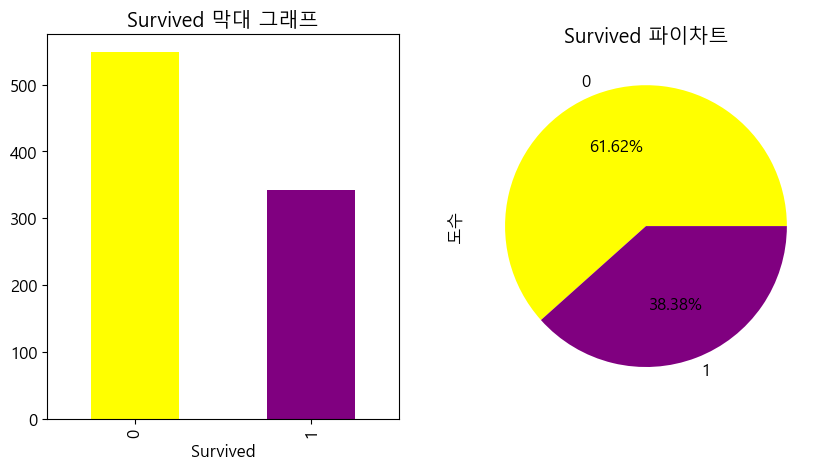

In [29]:
# plotting 환경 설정
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,5) # 그래프 크기
plt.rcParams['font.family'] = 'Malgun Gothic' # 글꼴
plt.rcParams['font.size'] = 12 # 글꼴 크기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 표기

fig, ax= plt.subplots(1, 2, figsize = (10, 5))

# 막대 그래프
ax[0].set_title('Survived 막대 그래프')
freq['도수'].plot.bar(ax = ax[0], color= ['yellow', 'purple'])

# 파이차트
ax[1].set_title('Survived 파이차트')
freq['도수'].plot.pie(ax = ax[1], autopct = '%.2f%%', colors = ['yellow', 'purple'])

plt.show()

## 1-3 양적변수

도수분포표, 상대도수분포표

In [57]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [49]:
result1 = pd.cut(titanic.Age, bins = 5) # 나이를 5개 구간으로 분리
freq1 = pd.DataFrame(result1.value_counts()).reset_index()
freq1.sort_values(by = 'Age', inplace = True)
freq1.columns = ['계급', '도수']

freq1['상대도수'] = freq1['도수'].apply(lambda x : x / freq1.도수.sum())
freq1

,계급,도수,상대도수
2,"(0.34, 16.336]",100,0.140056
0,"(16.336, 32.252]",346,0.484594
1,"(32.252, 48.168]",188,0.263305
3,"(48.168, 64.084]",69,0.096639
4,"(64.084, 80.0]",11,0.015406


In [54]:
result2 = pd.cut(titanic.Age, bins = [0, 20, 40, 60, float('inf')], right = False) # right = True 이면 0초과 20이하
freq2 = pd.DataFrame(result2.value_counts()).reset_index()
freq2.sort_values(by = 'Age', inplace = True)
freq2.columns = ['계급', '도수']

freq2['상대도수'] = freq2.도수.apply(lambda x : x / freq2.도수.sum())
freq2

,계급,도수,상대도수
1,"[0.0, 20.0)",164,0.229692
0,"[20.0, 40.0)",387,0.542017
2,"[40.0, 60.0)",137,0.191877
3,"[60.0, inf)",26,0.036415


계산적 대푯값
- 산술평균 : 주어진 수의 합을 수의 개수로 나눈 값, mean()
- 기하평균 : n개의 양수의 곱의 n 제곱근의 값 abc**(1/3)
    + 시간에 따라 변하는 비율의 대푯값
- 조화평균 : 역수의 산술평균의 역수 2ab / (a+b)
    - 계속 변화하는 속도의 대푯값
- 절사평균 : 자료의 총 개수에서 일정 비율만큼 가장 큰 부분과 작은 부분을 제거한 후 산출한 산술평균
- 평방평균 : 주어진 수를 각각 제곱하여 산술평균을 구하고 제곱근을 한 값
    + 비정상적 관측치의 영향을 부각시킬 때 사용

In [62]:
from scipy.stats.mstats import gmean, hmean, tmean
import numpy as np

example = [1,2,3,4,5,10]
print('산술평균 :', np.mean(example))
print('기하평균 :', gmean(example))
print('조화평균 :', hmean(example))

# 1이상 5이하의 범위를 벗어나는 값을 제외
print('절사평균 :', tmean(example, (1,5)))

print('평방평균 :', np.sqrt(np.mean([x*x for x in example])))

산술평균 : 4.166666666666667
기하평균 : 3.2598444275495897
조화평균 : 2.5174825174825175
절사평균 : 3.0
평방평균 : 5.082650227325635


위치적 대푯값

In [69]:
import numpy as np
print('중위수 :', titanic.Fare.median())
print('최빈값 :', titanic.Fare.mode()[0])
print('1사분위수 :', titanic.Fare.quantile(q = 0.25))
print('2사분위수 :', titanic.Fare.quantile(q = 0.50))
print('3사분위수 :', titanic.Fare.quantile(q = 0.75))
print('50백분위수 :', np.percentile(titanic.Fare, 50)) # 2사분위수랑 같음
print('75백분위수 :', np.percentile(titanic.Fare, 75)) # 3사분위수랑 같음

중위수 : 14.4542
최빈값 : 8.05
1사분위수 : 7.9104
2사분위수 : 14.4542
3사분위수 : 31.0
50백분위수 : 14.4542
75백분위수 : 31.0


절대적 산포도
> 범위, IQR, 분산, 표준편차 등

In [74]:
print('범위 :', (titanic.Fare.max(), titanic.Fare.min()))
print('IQR :', titanic.Fare.quantile(0.75) - titanic.Fare.quantile(0.25))
print('모분산 :', titanic.Fare.var(ddof = 0))
print('표본분산 :', titanic.Fare.var(ddof = 1))
print('모표준편차 :', titanic.Fare.std(ddof = 0))
print('표본표준편차 :', titanic.Fare.std(ddof = 1))

범위 : (512.3292, 0.0)
IQR : 23.0896
모분산 : 2466.6653116850434
표본분산 : 2469.436845743117
모표준편차 : 49.66553444477411
표본표준편차 : 49.693428597180905


상대적 산포도
> 사분위편차계수, 평균편차계수, 변동계수

왜도, 첨도
+ 왜도 : 비대칭 정도 (0이면 정규분포)
    + 음수이면 왼쪽 긴 꼬리, 양수이면 오른쪽 긴 꼬리
+ 첨도 : 뾰족한 정도 (3이면 정규분포)
    + 3보다 크면 정규분포보다 뾰족하고 꼬리가 얇음, 3보다 작으면 정규분포보다 덜 뾰족하고 꼬리가 긺

In [79]:
# pandas
print('왜도 : {:.3f}, 첨도 : {:.3f}'.format(titanic.Fare.skew(), titanic.Fare.kurt()))

# Scipy
from scipy.stats import skew, kurtosis
ssF = skew(titanic.Fare, bias = False)
ssT = skew(titanic.Fare, bias = True)
skF = kurtosis(titanic.Fare, bias = False)
skT = kurtosis(titanic.Fare, bias = True)

print('왜도 : {:.3f}({:.3f}), 첨도 : {:.3f}({:.3f})'.format(ssF,ssT,skF, skT))

왜도 : 4.787, 첨도 : 33.398
왜도 : 4.787(4.779), 첨도 : 33.398(33.204)


상관계수 : 피어슨의 적률상관계수
+ 양적변수의 상관관계

In [86]:
from scipy.stats import pearsonr
# PassengerId, Cabin이 없는 titanic에서 추가로 Age의 결측치가 있는 행 삭제
titanic = titanic.dropna(axis = 0)
corr, p = pearsonr(titanic.Age, titanic.Fare)
print('피어슨 상관계수 : {}, p-value : {}'.format(corr, p))

피어슨 상관계수 : 0.09314251789411519, p-value : 0.012904553407042496


양적변수 탐색 시각화
> 히스토그램, 오자이브, 상자그림, 산점도

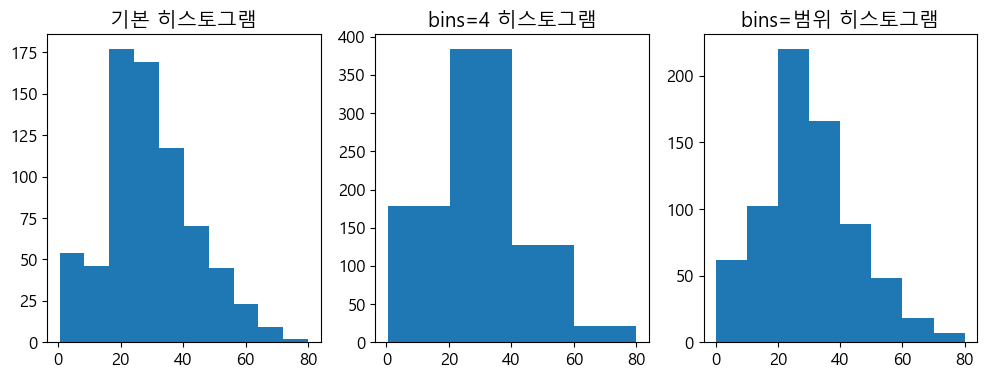

In [96]:
# 히스토그램
fig, ax = plt.subplots(1,3, figsize = (12, 4))

ax[0].hist(titanic.Age)
ax[0].set_title('기본 히스토그램')
ax[1].hist(titanic.Age, bins =4)
ax[1].set_title('bins=4 히스토그램')
ax[2].hist(titanic.Age, bins = [i for i in range(0, 90 ,10)])
ax[2].set_title('bins=범위 히스토그램')
plt.show()

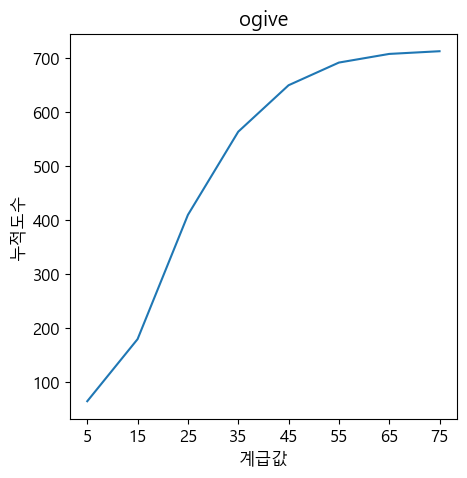

,계급,도수,누적도수,계급값
4,"(0, 10]",64,64,5.0
2,"(10, 20]",115,179,15.0
0,"(20, 30]",230,409,25.0
1,"(30, 40]",154,563,35.0
3,"(40, 50]",86,649,45.0
5,"(50, 60]",42,691,55.0
6,"(60, 70]",16,707,65.0
7,"(70, 80]",5,712,75.0


In [113]:
# 오자이브 그리기

## 도수분포표 그리기
result1 = pd.cut(titanic.Age, bins = [i for i in range(0, 90, 10)])
freq1 = pd.DataFrame(result1.value_counts()).reset_index()
freq1.sort_values(by = 'Age', inplace = True)
freq1.columns = ['계급','도수']
freq1['누적도수'] = freq1.도수.cumsum() # 누적도수 계산해서 표에 추가
freq1['계급값'] = freq1.계급.apply(lambda x : np.median([x.left, x.right]))

plt.plot(freq1.계급값, freq1.누적도수)
plt.xticks(freq1.계급값)
plt.xlabel('계급값')
plt.ylabel('누적도수')
plt.title('ogive')
plt.show()

freq1

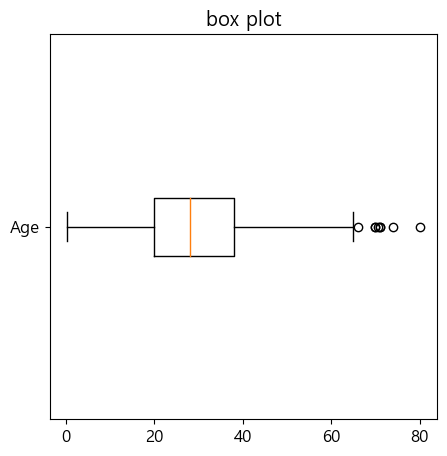

In [129]:
# 상자그림(boxplot)
import matplotlib.pyplot as plt

plt.boxplot(titanic['Age'], vert = False)
plt.title('box plot')
plt.yticks(ticks= [1], labels= ['Age'])
plt.show()

In [133]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


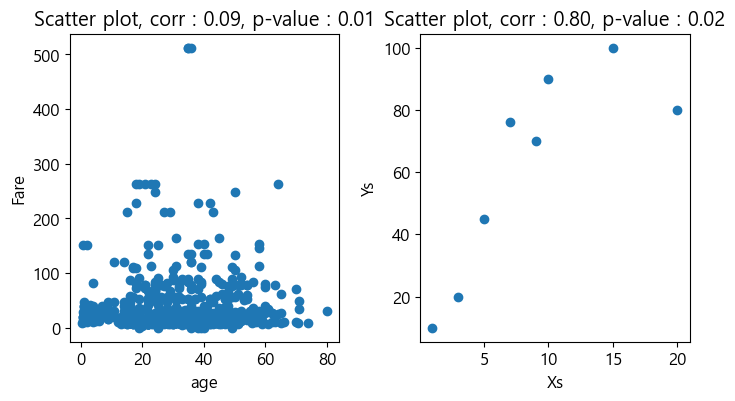

In [149]:
# 산점도
fig, ax = plt.subplots(1,2, figsize = (8, 4))
plt.subplots_adjust(wspace = 0.3)
corr , p = pearsonr(titanic.Age, titanic.Fare)

ax[0].scatter(titanic.Age, titanic.Fare)
ax[0].set_title('Scatter plot, corr : {:.2f}, p-value : {:.2f}'.format(corr, p))
ax[0].set_xlabel('age')
ax[0].set_ylabel('Fare')

Xs = [1,3,5,7,9,15,20,10]
Ys = [10,20,45,76,70,100,80,90]
corr1 , p1 = pearsonr(Xs, Ys)

ax[1].scatter(Xs, Ys)
ax[1].set_title('Scatter plot, corr : {:.2f}, p-value : {:.2f}'.format(corr1, p1))
ax[1].set_xlabel('Xs')
ax[1].set_ylabel('Ys')
plt.show()

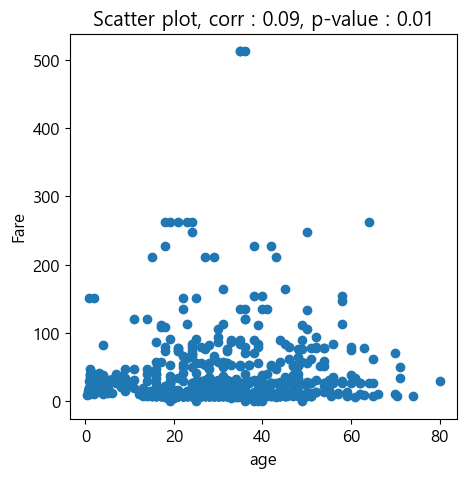

In [147]:
corr, p = pearsonr(titanic.Age, titanic.Fare)

plt.scatter(titanic.Age, titanic.Fare)
plt.title('Scatter plot, corr : {:.2f}, p-value : {:.2f}'.format(corr, p))
plt.xlabel('age')
plt.ylabel('Fare')
plt.show() # 비선형 관계임

## 연습문제

1. 다음 데이터를 탐색적 분석하세요  
age : 나이, job : 직업, marital : 결혼상태, education : 학력, default : 신용 불이행 여부, balance : 은행잔고  
housing : 부동산 대출 여부, loan : 개인 대출 여부, contact : 연락 수단, month : 마지막 연락한 달  
y : 고객의 정기예금 가입 여부(종속변수)

In [2]:
import pandas as pd

df = pd.read_csv('./data/practice1_bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,oct,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,may,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,apr,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,no


In [3]:
# 기본 정보 확인
df.info()

## 결측치는 존재하지 않고 질적변수가 job, marital, education, default, housing, loan, contact, month, y 이다.
## 양적변수는 age, balance 이다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   month      4521 non-null   object
 10  y          4521 non-null   object
dtypes: int64(2), object(9)
memory usage: 388.6+ KB


In [4]:
# 기술 통계량 확인
df.describe(include=['int64'])

,age,balance
count,4521.000000,4521.000000
mean,41.170095,1422.657819
std,10.576211,3009.638142
min,19.000000,-3313.000000
25%,33.000000,69.000000
50%,39.000000,444.000000
75%,49.000000,1480.000000
max,87.000000,71188.000000


In [5]:
# 기술 통계량 확인
df.describe(include=['object'])

## 대부분의 사람이 신용불량자가 아님을 알 수 있다.

,job,marital,education,default,housing,loan,contact,month,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,2
top,management,married,secondary,no,yes,no,cellular,may,no
freq,969,2797,2306,4445,2559,3830,2896,1398,4000


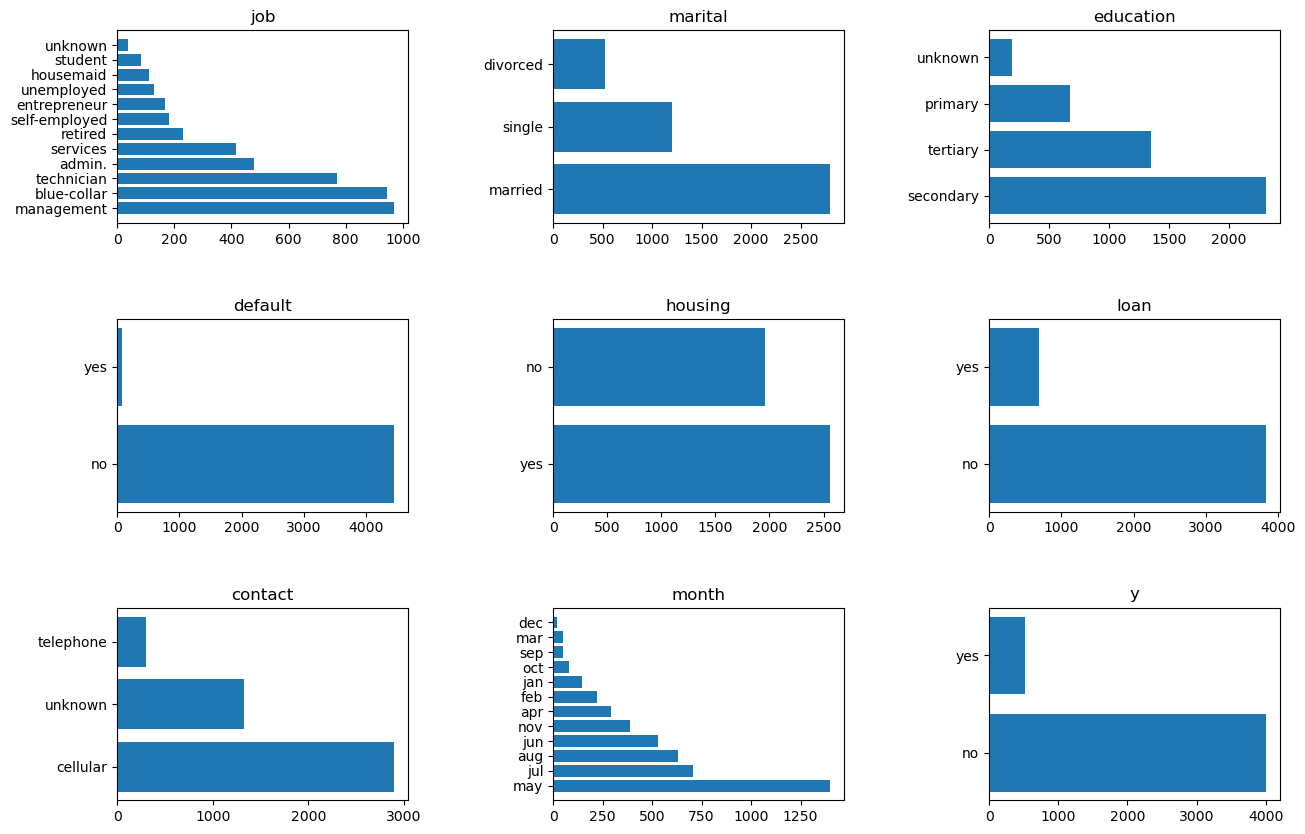

In [22]:
qual = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y']
quan = ['age', 'balance']

# 질적변수 시각화
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize = (15, 10))
plt.subplots_adjust(wspace= 0.5, hspace= 0.5)

for i, col in enumerate(qual):
    axes[i // 3, i % 3].barh(df[col].value_counts().index, df[col].value_counts().values)
    axes[i // 3, i % 3].set_title(col)

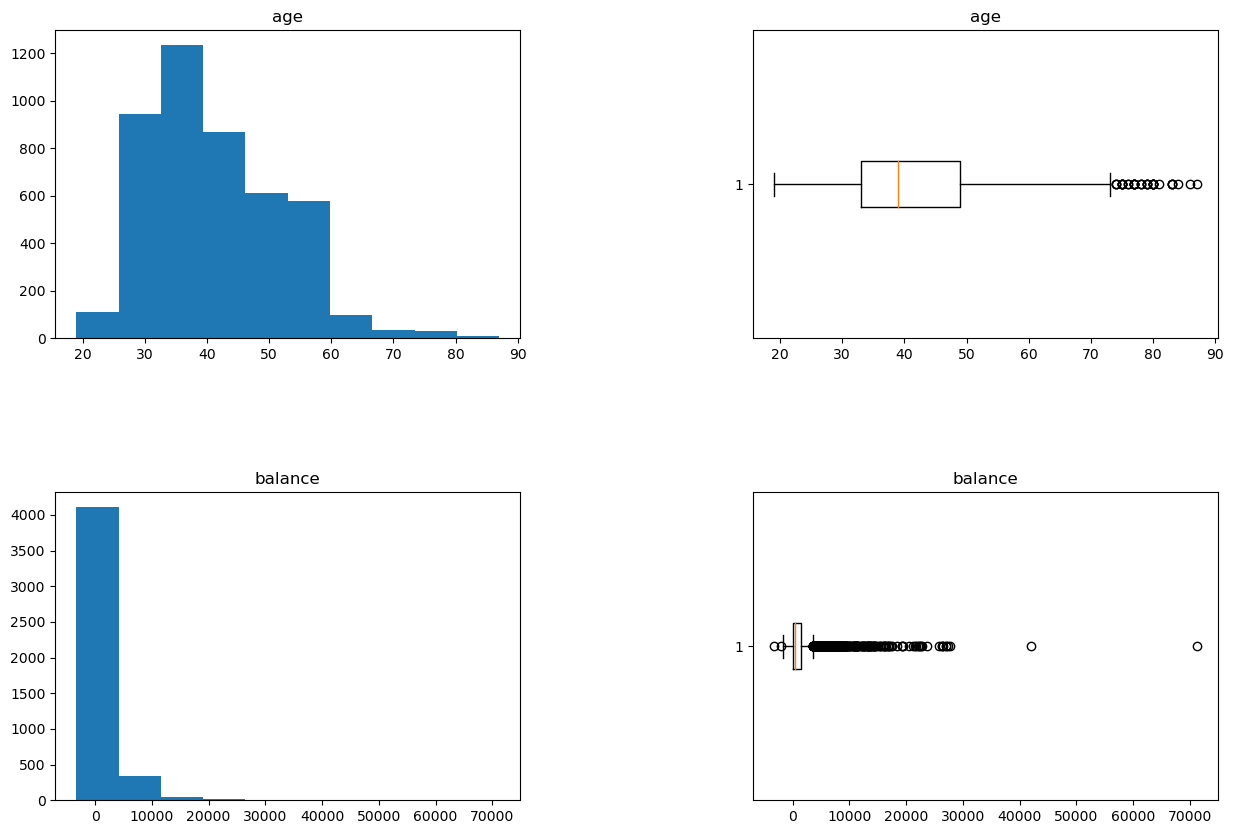

In [35]:
# 양적변수 시각화
fig, axes = plt.subplots(2, 2, figsize = (15, 10))
plt.subplots_adjust(wspace= 0.5, hspace= 0.5)

for i, col in enumerate(quan):
    axes[i, 0].hist(df[col])
    axes[i, 1].boxplot(df[col], vert = False)
    axes[i, 0].set_title(col)
    axes[i, 1].set_title(col)


2. 어느 회사의 연도별 임금상승률이다. 평균 임금상승률을 구하기 위해 어떤 대표값을 설정해야하는가?  
data = [0.04, 0.04, 0.05, 0.10, 0.08]

In [42]:
from scipy.stats.mstats import gmean

data = [0.04, 0.03, 0.05, 0.10, 0.08]
data1 = [1+x for x in data]
gmean(data1) - 1

# 평균 임금상승률은 5.9%

0.059681276222572244

3. 출근할 때 시속 3km/h, 퇴근할 때 시속 6km/h 일 때 평균속도를 구하라

In [44]:
# 평균속도를 구할 때는 조화평균을 사용한다.
from scipy.stats.mstats import hmean

hmean([3, 6]) # 평균속도는 4km/h

4.0

4. A = [200, 49], B = [190, 36] 방금 구매한 A, B 물품이 모두 210 이라면 상대적으로 어느 것이 더 무거운가? [평균, 분산]

In [47]:
# 표준화한 점수로 비교하자.

import numpy as np
z1 = (210-200) / np.sqrt(49)
z2 = (210-190) / np.sqrt(36)

z1, z2 # z2 가 더 크므로 z2가 상대적으로 더 무겁다.

(1.4285714285714286, 3.3333333333333335)

5. A = [10, 1], B = [8, 1] A와 B 중 어느 것의 용돈 격차가 더 심한가? [평균, 표준편차]

In [50]:
# 변동계수를 이용해 단위가 다른 두 집단의 차이를 비교
a = 2 / 10
b = 1 / 8

a, b # a가 변동계수가 더 크므로 a가 용돈 격차가 더 심하다.

(0.2, 0.125)